In [44]:
import warnings
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from IPython.core.pylabtools import figsize

from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report, roc_curve, roc_auc_score, precision_recall_curve

df = pd.read_csv('gameInfo.csv', sep=",")

# Analyzing the Data

Looking over the data to make sure that it is okay

In [2]:
df.head()

,teamA_player1,teamA_player2,teamA_player3,teamA_player4,teamA_player5,teamB_player1,teamB_player2,teamB_player3,teamB_player4,teamB_player5,win
0,201,102,131,121,157,89,29,4,876,120,1
1,120,13,202,75,350,99,117,11,55,86,0
2,102,122,222,110,111,39,30,99,202,63,1
3,18,99,245,17,62,21,63,254,777,150,0
4,102,82,131,89,22,114,235,64,105,21,0


In [3]:
print("Dimension of the data: ", df.shape)

no_of_rows = df.shape[0]
no_of_columns = df.shape[1]

print("No. of Rows: %d" % no_of_rows)
print("No. of Columns: %d" % no_of_columns)

Dimension of the data:  (1074, 11)
No. of Rows: 1074
No. of Columns: 11


In [4]:
df.describe()

,teamA_player1,teamA_player2,teamA_player3,teamA_player4,teamA_player5,teamB_player1,teamB_player2,teamB_player3,teamB_player4,teamB_player5,win
count,1074.000000,1074.000000,1074.000000,1074.000000,1074.000000,1074.000000,1074.000000,1074.000000,1074.000000,1074.000000,1074.000000
mean,146.498138,163.103352,159.216015,166.610801,164.632216,148.362197,158.076350,159.130354,168.678771,152.831471,0.511173
std,170.340771,180.729421,168.398486,193.529900,177.393723,163.582892,172.153202,180.001516,189.608588,176.364980,0.500108
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,45.000000,50.000000,54.000000,50.000000,53.000000,43.000000,53.000000,51.000000,54.000000,45.000000,0.000000
50%,86.000000,103.000000,101.000000,99.000000,99.000000,89.000000,99.000000,98.000000,103.000000,92.000000,1.000000
75%,163.000000,203.000000,203.000000,203.000000,222.000000,164.000000,202.000000,203.000000,203.000000,164.000000,1.000000
max,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,1.000000


In [6]:
X = df.drop(labels='win', axis=1)
y = df['win']

print("Dimension of the Data Matrix X: ", X.shape)
print("No. of Rows: %d" % X.shape[0])
print("No. of Columns: %d" % X.shape[1])

print("Dimension of the 1D Vector y: ", y.shape)
print("No. of Rows: %d" % y.shape[0])
print("No. of Columns: %d" % 1)

Dimension of the Data Matrix X:  (1074, 10)
No. of Rows: 1074
No. of Columns: 10
Dimension of the 1D Vector y:  (1074,)
No. of Rows: 1074
No. of Columns: 1


# Training the Model

Splitting the data into a training and test set

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [54]:
# Create linear regression object
logisticRegresssion_clf = LogisticRegression()

# Train the model using the traing data and label
logisticRegresssion_clf.fit(X_train, y_train)

LogisticRegression()

## Calculating the ROC Curve

In [55]:
y_scores = cross_val_predict(logisticRegresssion_clf, X_train, y_train, method="predict_proba", cv=5)[:, 1]

fpr, tpr, thresholds = roc_curve(y_train, y_scores)

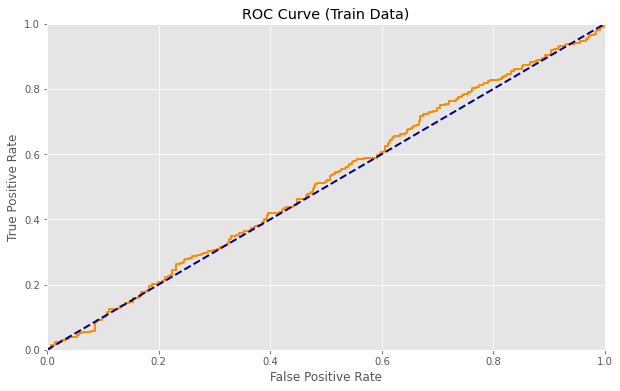

In [56]:
plt.style.use('ggplot')

fig = plt.figure(figsize=(10, 6))
def plot_roc_curve(fpr, tpr, label=None): 
    plt.plot(fpr, tpr, color='darkorange', linewidth=2, label=label) 
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.axis([0, 1, 0, 1])
    plt.title('ROC Curve (Train Data)')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(fpr, tpr)
plt.show()

In [63]:
y_scores = cross_val_predict(logisticRegresssion_clf, X_train, y_train, method="predict_proba", cv=5)[:, 1]

fpr, tpr, thresholds = roc_curve(y_train, y_scores)

In [65]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

threshold_optimal = -1
for i in range(len(precisions)):
    if(precisions[i] == recalls[i]):
        threshold_optimal = thresholds[i]

print("Optimal Threshold: ", threshold_optimal)

Optimal Threshold:  0.7597609156519374


In [13]:
roc_auc_score(y_train,y_scores)

0.5126595329050182

## Plotting Precision-Recall Curve

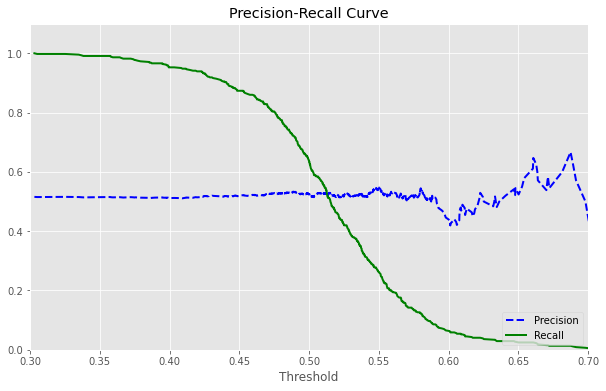

In [67]:
fig = plt.figure(figsize=(10, 6))
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds): 
    plt.plot(thresholds, precisions[:-1], "b--",  linewidth=2, label="Precision") 
    plt.plot(thresholds, recalls[:-1], "g-",  linewidth=2, label="Recall") 
    plt.xlabel("Threshold")
    plt.legend(loc="lower right")
    plt.title('Precision-Recall Curve')
    plt.xlim([0.3, 0.7])
    plt.ylim([0, 1.1])

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

# Results

In [57]:
# Make predictions using the test data
y_predicted = logisticRegresssion_clf.predict(X_test)

accuracy_score_test = np.mean(y_predicted == y_test)
print("\nAccuracy: ", accuracy_score_test)

print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_predicted))

precision_test = precision_score(y_test, y_predicted, average='micro') 
print("\nTest Precision = %f" % precision_test)

recall_test = recall_score(y_test, y_predicted, average='micro')
print("\nTest Recall = %f" % recall_test)


f1_test = f1_score(y_test, y_predicted, average='micro')
print("\nTest F1 Score = %f" % f1_test)


print("\nClassification Report:")
print(classification_report(y_test, y_predicted))


Accuracy:  0.5348837209302325

Test Confusion Matrix:
[[43 66]
 [34 72]]

Test Precision = 0.534884

Test Recall = 0.534884

Test F1 Score = 0.534884

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.39      0.46       109
           1       0.52      0.68      0.59       106

    accuracy                           0.53       215
   macro avg       0.54      0.54      0.53       215
weighted avg       0.54      0.53      0.53       215

